In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import sklearn.metrics as mc
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [26]:
plt.style.available
plt.style.use("ggplot")

In [27]:
data=pd.read_csv("seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [28]:
data["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [29]:
def month(text):
    return text[5:7]

data.insert(0,"month",value=data["date"].apply(month))

In [30]:
data.drop("date",inplace=True,axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [32]:
data.isna().sum()

month            0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [33]:
data["weather"].unique()
data

,month,precipitation,temp_max,temp_min,wind,weather
0,01,0.0,12.8,5.0,4.7,drizzle
1,01,10.9,10.6,2.8,4.5,rain
2,01,0.8,11.7,7.2,2.3,rain
3,01,20.3,12.2,5.6,4.7,rain
4,01,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,12,8.6,4.4,1.7,2.9,rain
1457,12,1.5,5.0,1.7,1.3,rain
1458,12,0.0,7.2,0.6,2.6,fog
1459,12,0.0,5.6,-1.0,3.4,sun


In [34]:
list1 = [x for x in data["weather"] if x =="rain"]
list2 =[x for x in data["weather"] if x =="drizzle"]
list3 =[x for x in data["weather"] if x =="sun"]
list4 =[x for x in data["weather"] if x =="snow"]
list5 =[x for x in data["weather"] if x =="fog"]

classes = [len(list1),len(list2),len(list3),len(list4),len(list5)]
classes



[641, 53, 640, 26, 101]

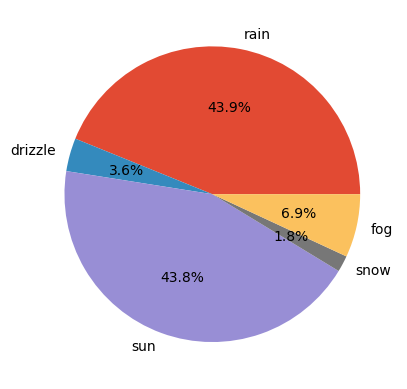

In [35]:

plt.pie(x=classes,labels=["rain","drizzle","sun","snow","fog"],autopct="%1.1f%%")
plt.show()

<Axes: >

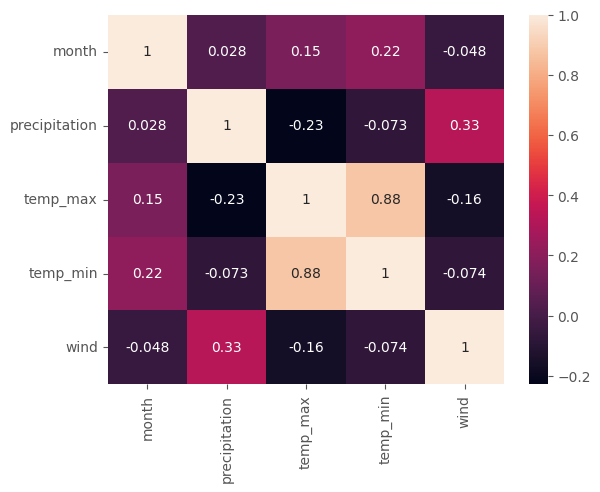

In [37]:
corr = data.iloc[:,:-1].corr()
sns.heatmap(corr,annot=True)

In [ ]:

fetures = data.iloc[:,:-1]
classes = data.iloc[:,-1]
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(fetures, classes)
df_resampled = pd.DataFrame(X_resampled, columns=X_resampled.columns)
df_resampled['weather'] = y_resampled  # Add label column



In [39]:
list1 = [x for x in df_resampled["weather"] if x =="rain"]
list2 =[x for x in df_resampled["weather"] if x =="drizzle"]
list3 =[x for x in df_resampled["weather"] if x =="sun"]
list4 =[x for x in df_resampled["weather"] if x =="snow"]
list5 =[x for x in df_resampled["weather"] if x =="fog"]

classes = [len(list1),len(list2),len(list3),len(list4),len(list5)]
classes


[641, 641, 641, 641, 641]

<Axes: >

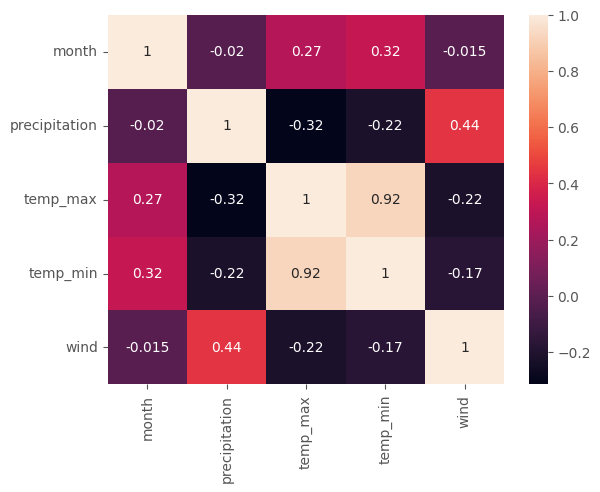

In [40]:
corr = df_resampled.iloc[:,:-1].corr()
sns.heatmap(corr,annot=True)

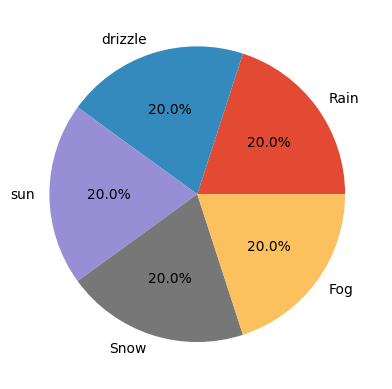

In [41]:
plt.pie(x=classes,labels=["Rain","drizzle","sun","Snow","Fog"],autopct="%1.1f%%")
plt.show()

In [67]:
#! OverSampling Data
accuracy_scores = []
for estimotir in range(1,180,5):
    classifier = RandomForestClassifier(n_estimators=estimotir,random_state=1,class_weight="balanced")
    x=df_resampled.iloc[:,:-1]
    y=df_resampled.iloc[:,-1]
    x_train ,x_test  , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
    classifier.fit(x_train,y_train)
    y_predict = classifier.predict(x_test)
    acc = mc.accuracy_score(y_test,y_predict) * 100
    accuracy_scores.append((estimotir,acc))
    if 97 < acc <= 100:
        print(estimotir , acc ,sep=" = ")


In [ ]:

classifier = RandomForestClassifier(n_estimators=31,random_state=1,class_weight="balanced")
x=df_resampled.iloc[:,:-1]
y=df_resampled.iloc[:,-1]
x_train ,x_test  , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
# print(classifier.feature_importances_)

print(mc.accuracy_score(y_test,y_predict)*100)

94.69578783151326


              precision    recall  f1-score   support

     drizzle       0.95      1.00      0.97       128
         fog       0.90      1.00      0.95       127
        rain       1.00      0.88      0.94       136
        snow       0.98      1.00      0.99       119
         sun       0.92      0.86      0.89       131

    accuracy                           0.95       641
   macro avg       0.95      0.95      0.95       641
weighted avg       0.95      0.95      0.95       641



array([[128,   0,   0,   0,   0],
       [  0, 127,   0,   0,   0],
       [  1,   2, 120,   3,  10],
       [  0,   0,   0, 119,   0],
       [  6,  12,   0,   0, 113]])

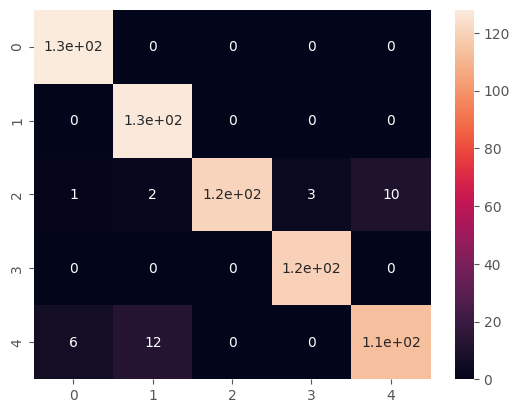

In [ ]:
print(mc.classification_report(y_test,y_predict))
sns.heatmap(mc.confusion_matrix(y_test,y_predict),annot=True)
mc.confusion_matrix(y_test,y_predict)

In [ ]:
print("Accuracy Range After Over Sampling")
print(min(accuracy_scores,key=lambda e: e[1])[1] , max(accuracy_scores,key=lambda e: e[1])[1] , sep=" ~ ")

Accuracy Range After Over Sampling
90.01560062402496 ~ 94.69578783151326


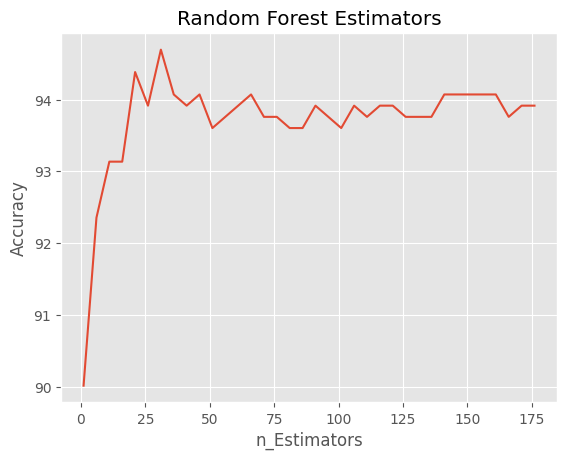

In [68]:
ax = plt.axes()
ax.set(xlabel='n_Estimators', ylabel='Accuracy',title="Random Forest Estimators")
plt.plot([x for x ,y in accuracy_scores],[y for x ,y in accuracy_scores],scalex=True)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (0,) and (641,)

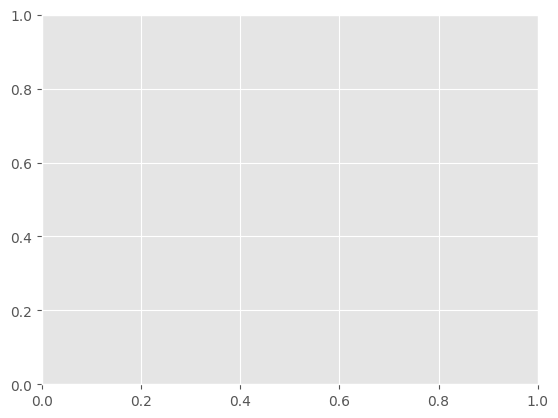

In [ ]:
m = []
for estimotir in range(1,200,5):
    classifier = RandomForestClassifier(n_estimators=estimotir,random_state=1,class_weight="balanced")
    x=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    x_train ,x_test  , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
    classifier.fit(x_train,y_train)
    y_predict = classifier.predict(x_test)
    accuracy = mc.accuracy_score(y_test,y_predict) * 100
    m.append((estimotir,accuracy))



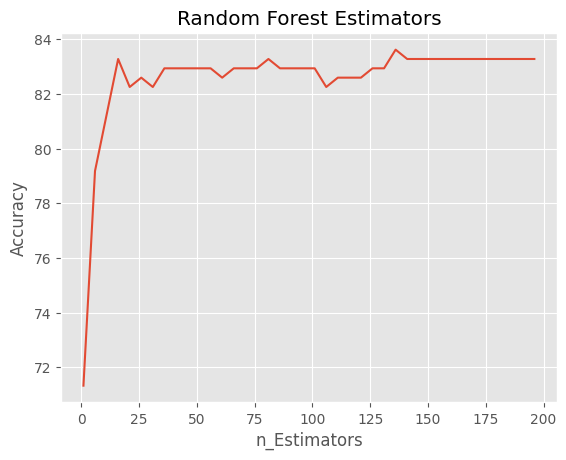

In [ ]:
ax = plt.axes()
ax.set(xlabel='n_Estimators', ylabel='Accuracy',title="Random Forest Estimators")
plt.plot([x for x ,y in m],[y for x ,y in m],scalex=True)
plt.show()

In [ ]:
month_2 = 12 #datetime.datetime.now().month
if month_2 in range(1,10):
    print(0)
    str_month = "0" + str(month_2)
    test = pd.DataFrame({"month":[str_month],"precipitation":[0],"temp_max":[30],"temp_min":[18],"wind":[15]})
    result = classifier.predict(test)
    print(result)
else:
    str1_month = str(month_2)
    test = pd.DataFrame({"month":[str1_month],"precipitation":[0],"temp_max":[30],"temp_min":[10],"wind":[15]})
    result = classifier.predict(test)
    print(result)
    


['sun']
